# Bruno's Youtube Analysis

### Updating and Importing Necessary Libraries and the Dataframe

In [1]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7
  Attempting uninstall: Flask
    Found existing installation: Flask 2.3.3
    Uninstalling Flask-2.3.3:
      Successfully uninstalled Flask-2.3.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from dash import Dash, html, dcc
from plotly.subplots import make_subplots
from dash.dependencies import Output, Input
from dash.exceptions import PreventUpdate
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('/kaggle/input/global-youtube-statistics-2023/Global YouTube Statistics.csv', encoding='latin1')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


### Exploring and Cleaning the Data

In [4]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298241e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.752611e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


#### Changing NaN fields by not nulls

In [5]:
df.columns
string_columns = df.select_dtypes(include='object').columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[string_columns] = df[string_columns].fillna('Not Specified')
df[numeric_columns] = df[numeric_columns].fillna(0)
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,0.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


#### Dropping outliers based on violin and boxplot

In [6]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Boxplot and Violin Plot Visualization"),
    
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in df.columns if df[col].dtype in ['int64', 'float64']],
        value='subscribers',
        clearable=False
    ),
    
    dcc.Graph(id='plots-graph'),
])

@app.callback(
    Output('plots-graph', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_graph(selected_column):
    # Create subplots: 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Box Plot', 'Violin Plot'))

    # Add box plot
    fig.add_trace(go.Box(y=df[selected_column], name="Box Plot", boxmean=True), row=1, col=1)
    
    # Add violin plot
    fig.add_trace(go.Violin(y=df[selected_column], name="Violin Plot", box_visible=True, line_color="blue"), row=1, col=2)
    
    # Update layout
    fig.update_layout(title_text="Box Plot and Violin Plot for " + selected_column)
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=9018)

In [7]:
df_for_analysis = df[
    ~(
        (df['created_year'] == 1970) |
        (df['subscribers'] > 120 * 10**6) |
        (df['video views'] > 101 * 10**9) |
        (df['uploads'] > 212 * 10**3) |
        (df['highest_monthly_earnings'] == 13.6 * 10**6) |
        (df['Population'] > 500 * 10**6) |
        (df['subscribers_for_last_30_days'] > 2.1 * 10**6) |
        (df['video_views_for_the_last_30_days'] > 1.6 * 10**9)
    )
]
df_for_analysis = df_for_analysis[['rank', 'subscribers', 'video views',
       'uploads',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']]

In [8]:
app = Dash(__name__)

app.layout = html.Div([
    html.H1("Boxplot and Violin Plot Visualization"),
    
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in df_for_analysis.columns if df_for_analysis[col].dtype in ['int64', 'float64']],
        value='subscribers',
        clearable=False
    ),
    
    dcc.Graph(id='plots-graph'),
])

@app.callback(
    Output('plots-graph', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_graph(selected_column):
    # Create subplots: 1 row and 2 columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Box Plot', 'Violin Plot'))

    # Add box plot
    fig.add_trace(go.Box(y=df_for_analysis[selected_column], name="Box Plot", boxmean=True), row=1, col=1)
    
    # Add violin plot
    fig.add_trace(go.Violin(y=df_for_analysis[selected_column], name="Violin Plot", box_visible=True, line_color="blue"), row=1, col=2)
    
    # Update layout
    fig.update_layout(title_text="Box Plot and Violin Plot for " + selected_column)
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=9012)

### Checking relations between data

#### Heatmap

<Axes: >

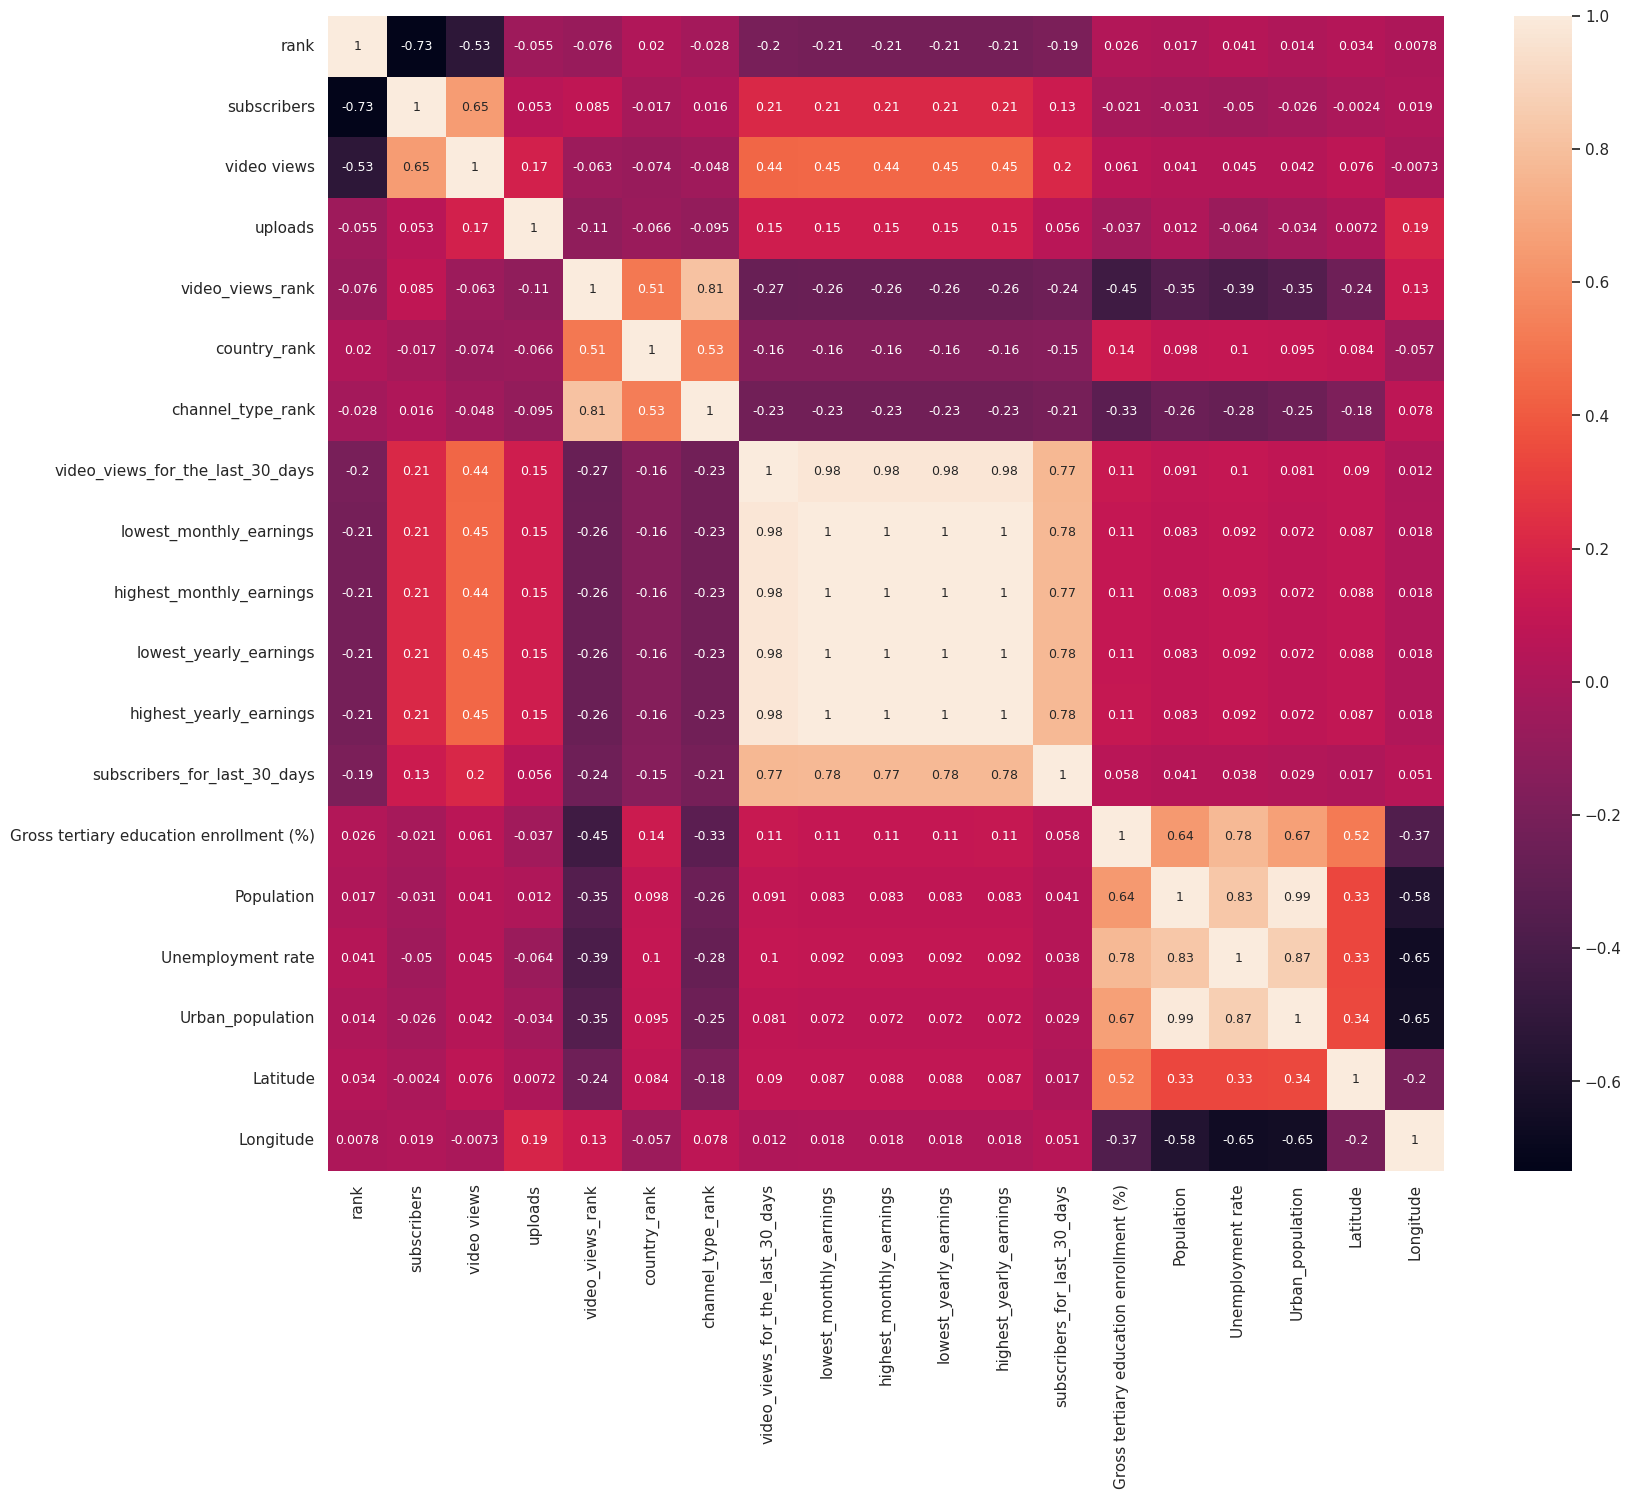

In [9]:
sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(df_for_analysis.corr(), annot=True, annot_kws={"size": 9})

##### We can see that there is a few major sections. Let's separate them for better analysis

In [10]:
section_1 = df_for_analysis[['rank', 'subscribers', 'video views',
       'uploads',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days']]

section_2 = df_for_analysis[[
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']]

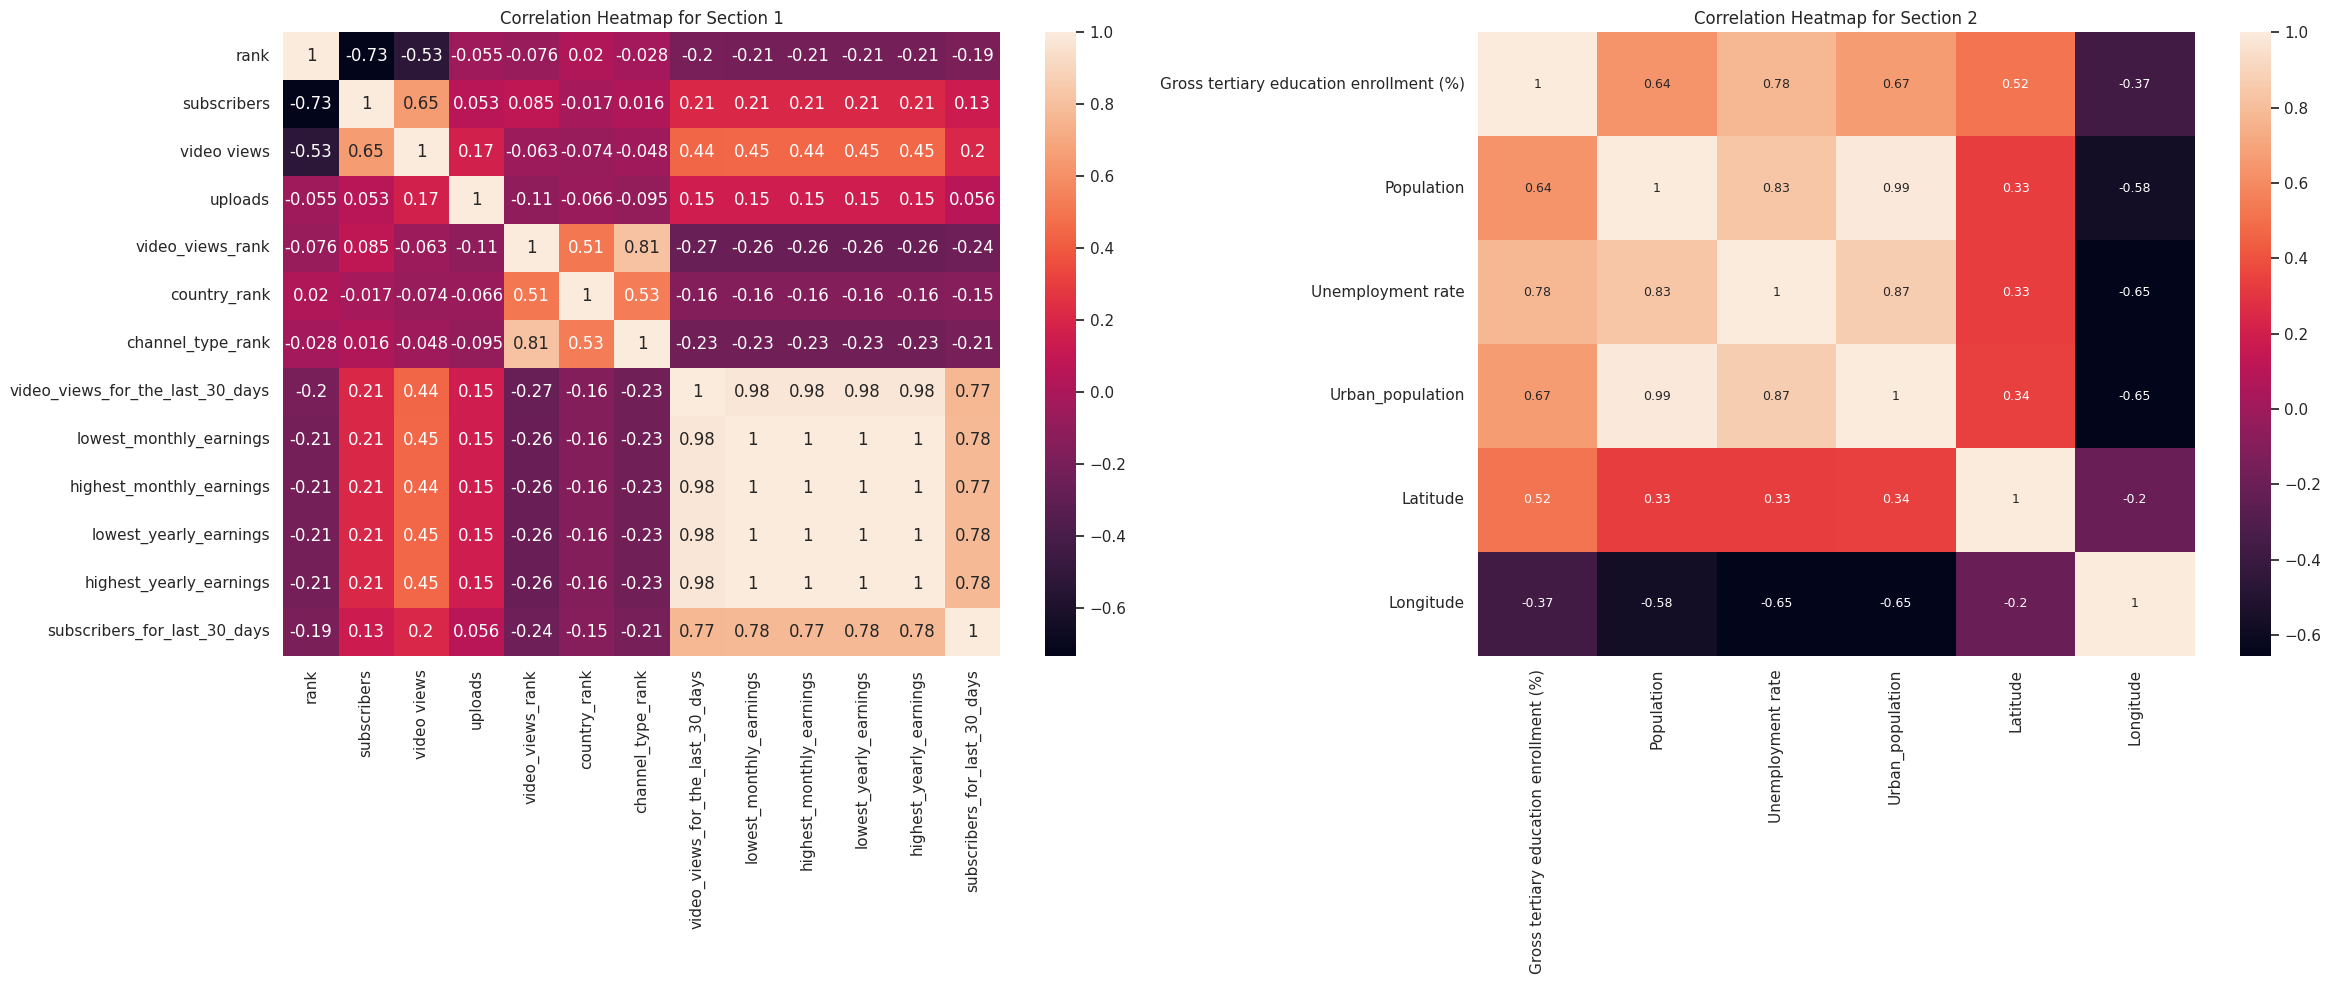

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# Create the heatmaps
sns.heatmap(section_1.corr(), annot=True, annot_kws={"size": 12}, ax=axes[0])
axes[0].set_title("Correlation Heatmap for Section 1")

sns.heatmap(section_2.corr(), annot=True, annot_kws={"size": 9}, ax=axes[1])
axes[1].set_title("Correlation Heatmap for Section 2")

plt.tight_layout()
plt.show()

##### Section 1, for our analysis, is the one that matters. Section 2 has no major relation with youtube success, after removing the outliers

##### Lets see the heatmap and contour plot for section 1:

<Axes: >

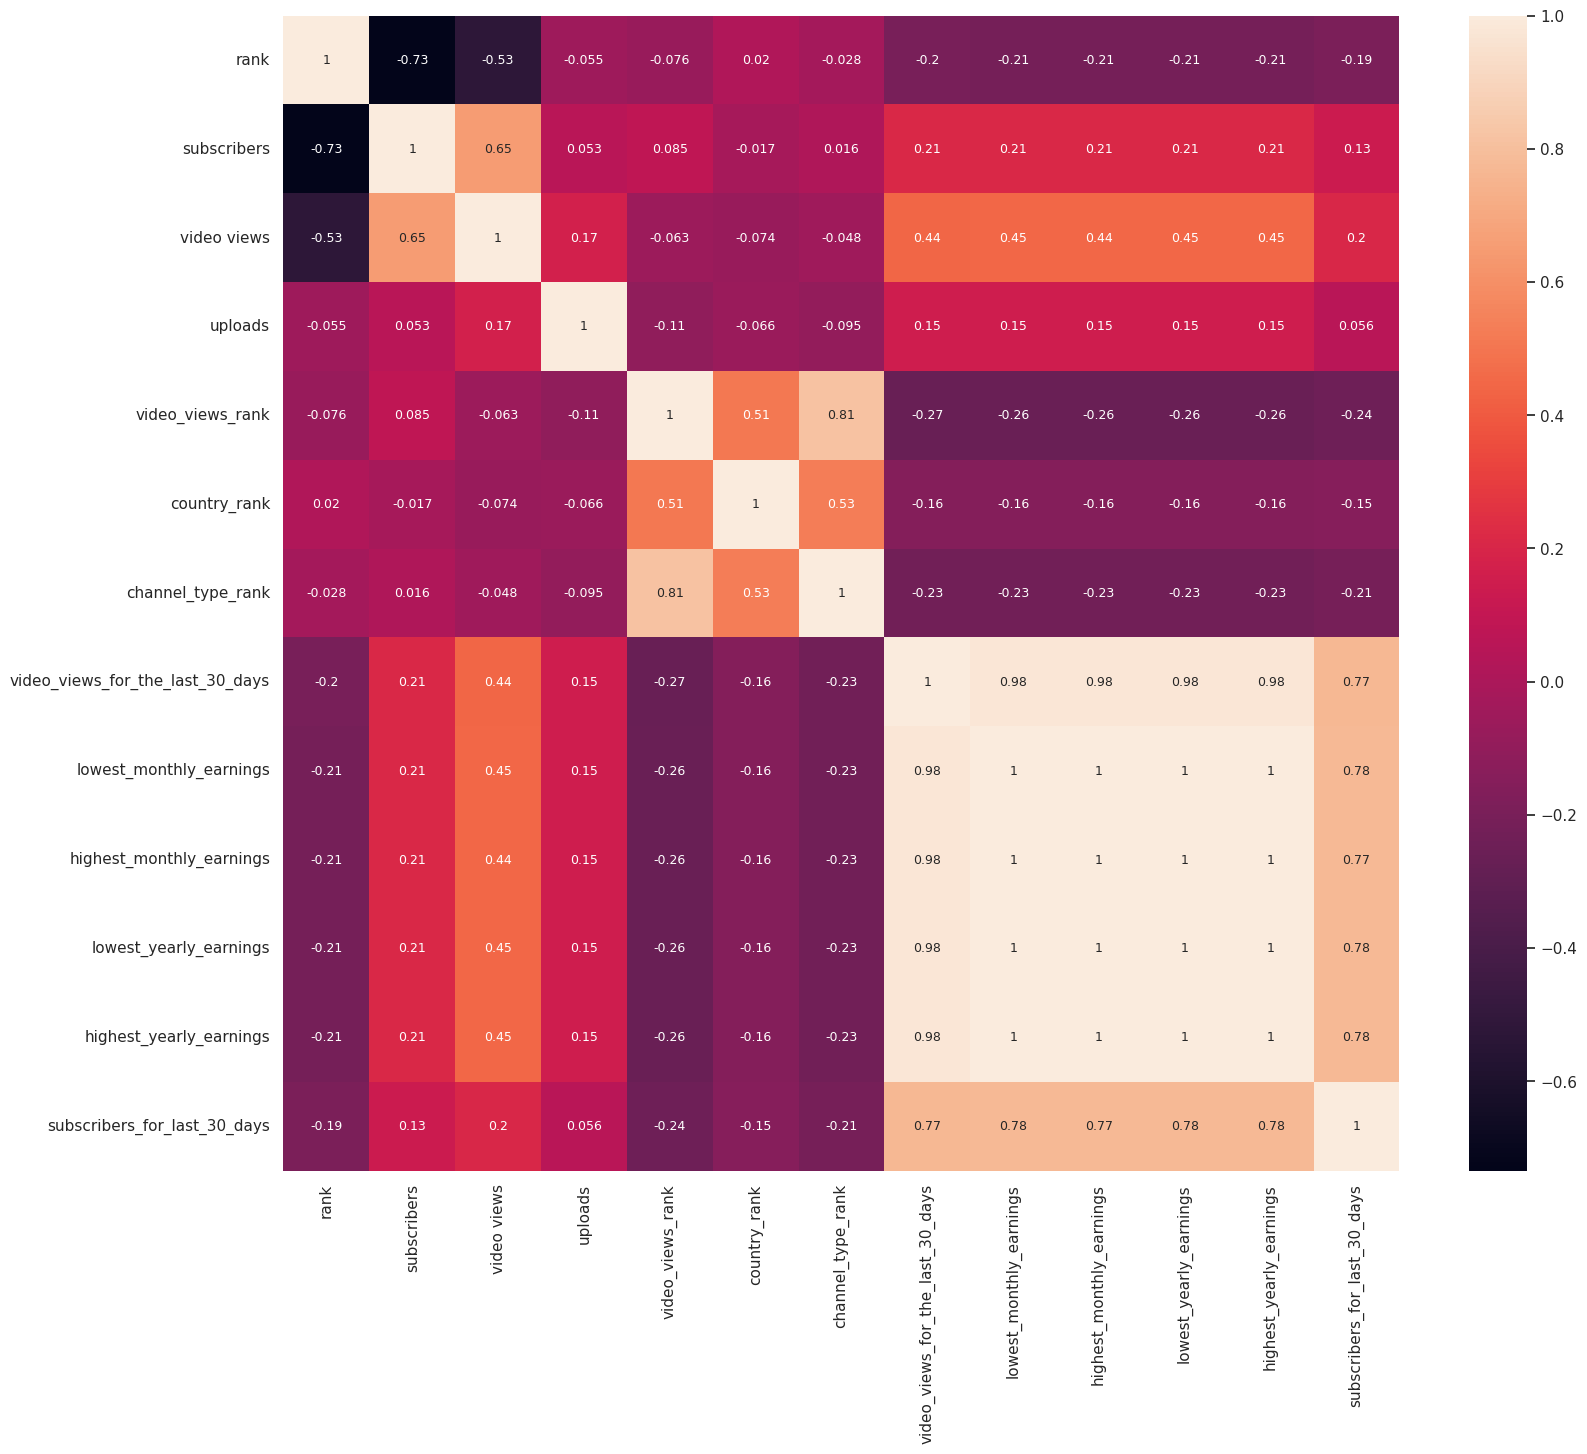

In [12]:
sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(section_1.corr(), annot=True, annot_kws={"size": 9})

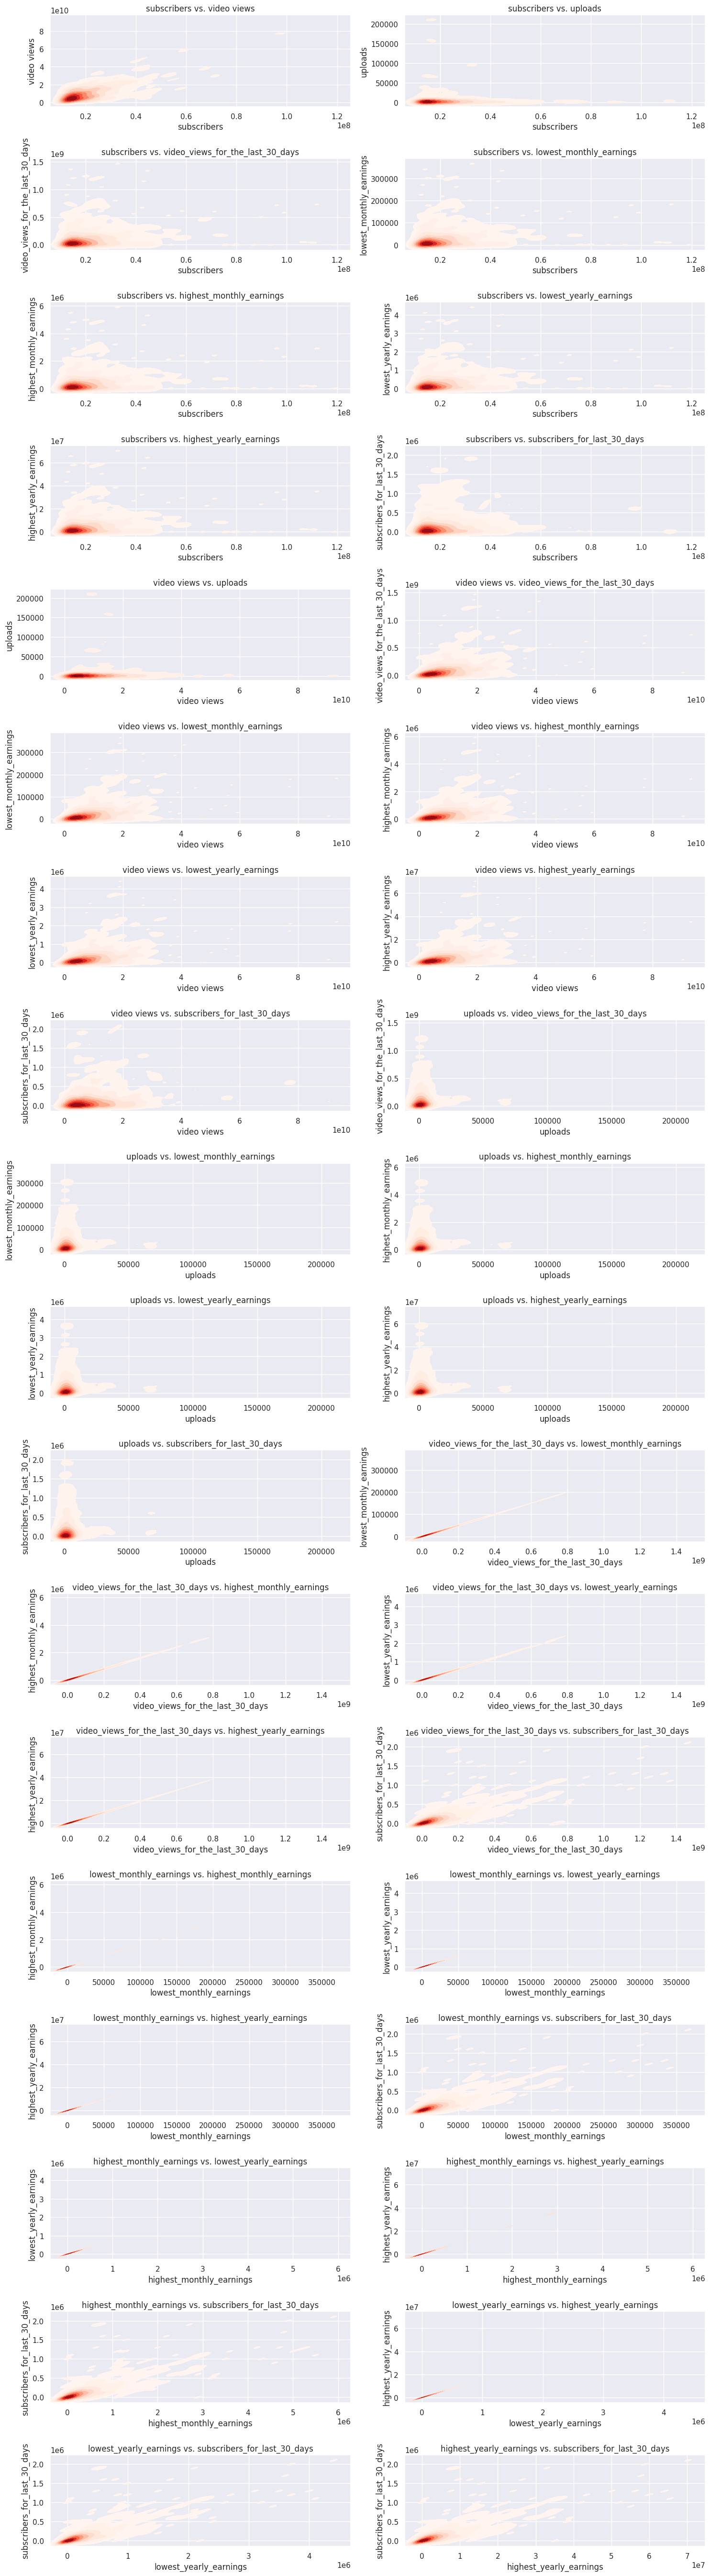

In [13]:
from itertools import combinations

ys = ['subscribers', 'video views',
       'uploads',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days']

combs = list(combinations(ys, 2))  # Generate all combinations
nrows = (len(combs) + 1) // 2 

fig, axes = plt.subplots(nrows, 2, figsize=(15, 3*nrows))

flat_axes = axes.flatten()

# Iterate over combinations and axes to plot
for (y1, y2), ax in zip(combs, flat_axes):
    sns.kdeplot(x=section_1[y1], y=section_1[y2], cmap="Reds", fill=True, bw_adjust=.5, ax=ax)
    ax.set_title(f"{y1} vs. {y2}")
    ax.set_xlabel(y1)
    ax.set_ylabel(y2)

# Turn off any remaining unused subplots
for i in range(len(combs), 2 * nrows):
    flat_axes[i].axis('off')

plt.tight_layout()
plt.show()

We can see that there is a HUGE difference between the top and the bottom of the pyramid of youtube. Most of the data is concentrated on the bottom, for every single column, even after removing the major outliers. If we removed more, we might've got a major problem with the analysis.

##### Let's see how K-means performs here:

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
numeric_features = section_1.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ],
    remainder='drop'
)

###### "Elbow Method" to decide how many clusters we'll have

/tmp/ipykernel_19/986785448.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



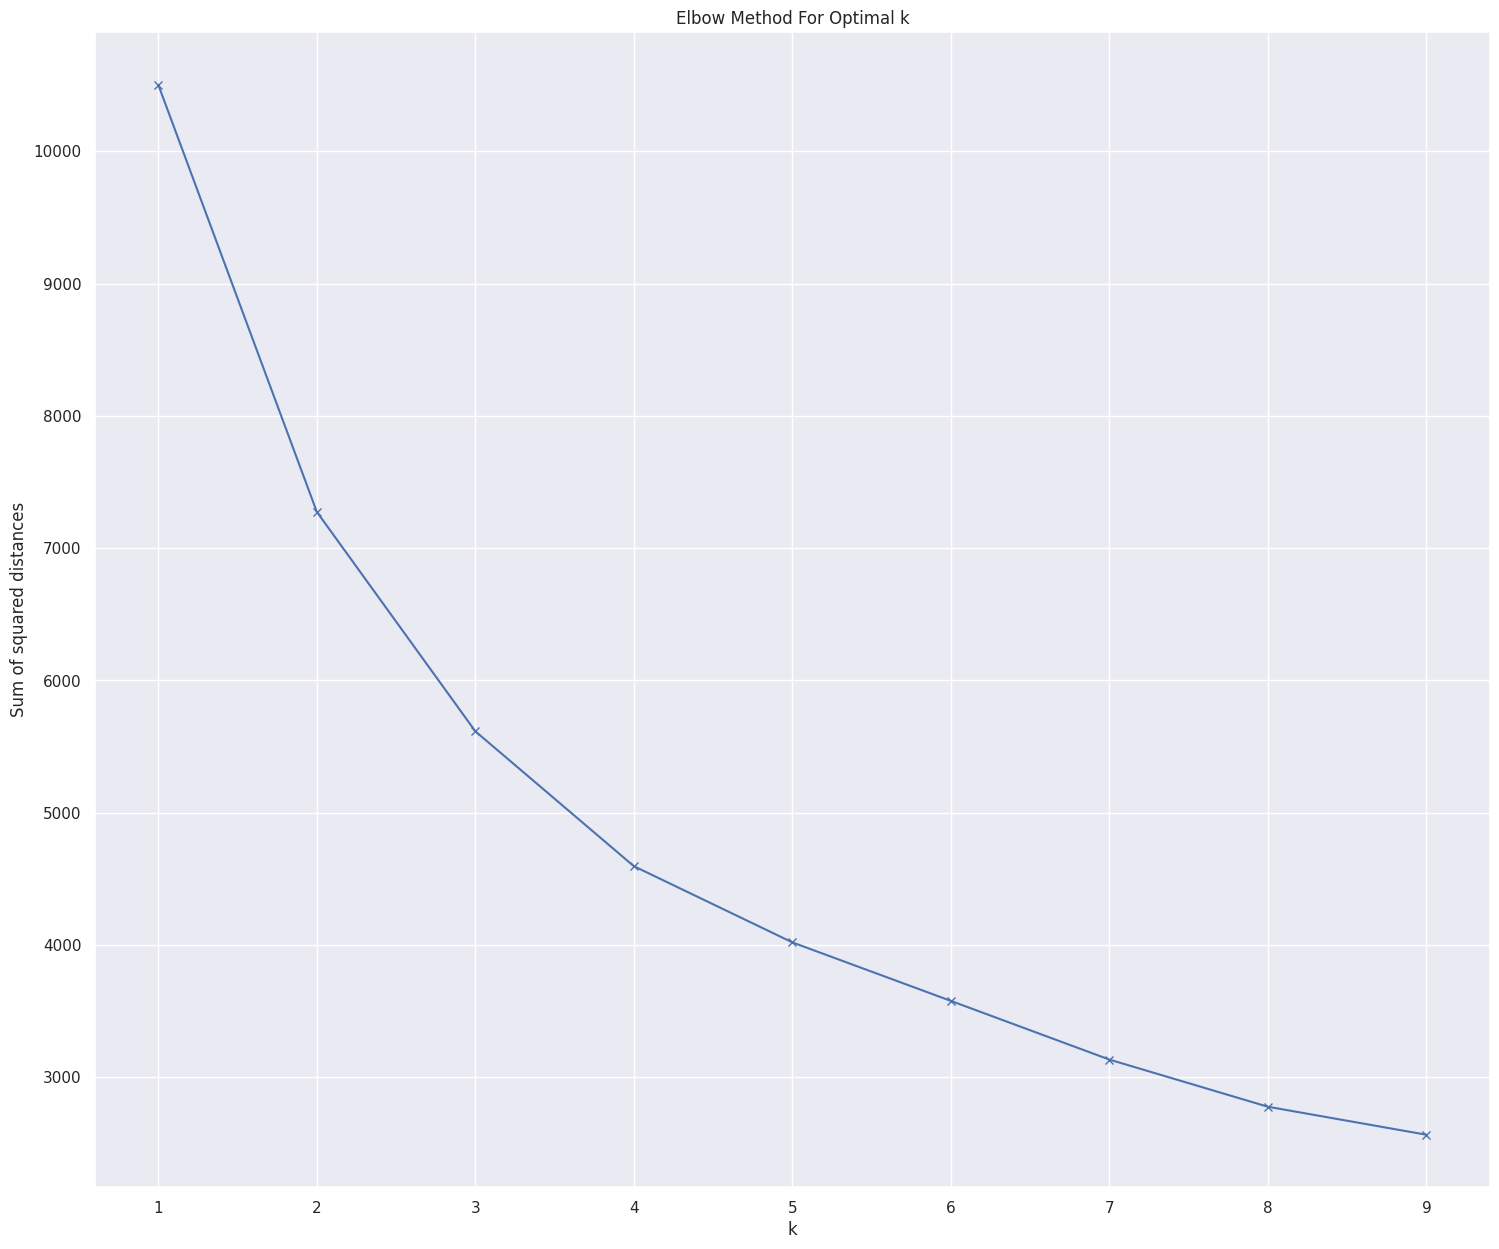

In [17]:
K = range(1,10)
section_1.fillna(0, inplace=True)
X = preprocessor.fit_transform(section_1)
SSD = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    SSD.append(km.inertia_)

plt.plot(K, SSD, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

By the "elbow method", the best cluster number is 4.

###### K-means training and plotting

In [18]:
X = preprocessor.fit_transform(section_1)

n_clusters = 4  # Choose based on elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
section_1['cluster'] = kmeans.fit_predict(X)

/tmp/ipykernel_19/728773752.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



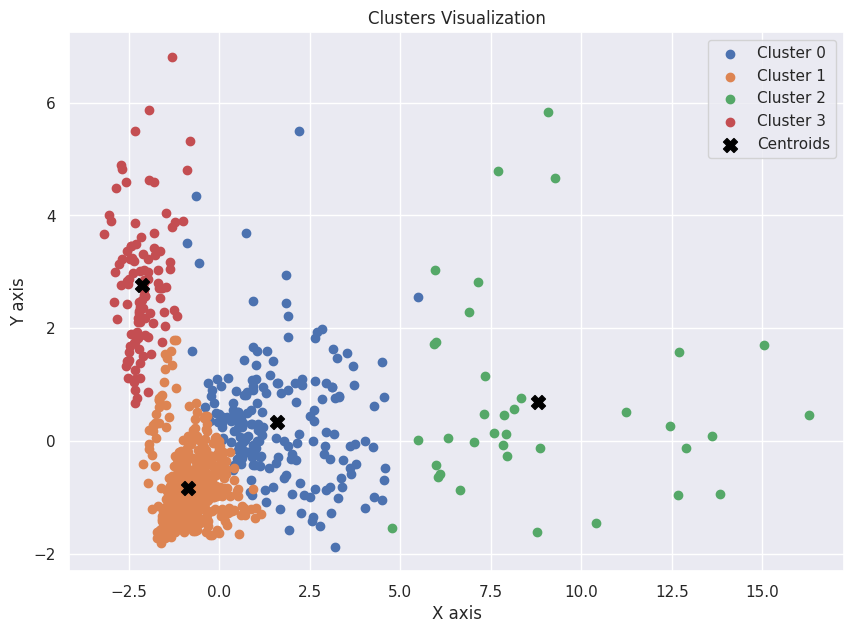

In [19]:
from sklearn.decomposition import PCA

def plot_clusters(data, kmeans_model):
    # Using PCA to reduce dimensionality to 2 dimensions
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)

    # Get cluster assignments
    labels = kmeans_model.labels_

    # Plotting
    plt.figure(figsize=(10, 7))
    for i in range(kmeans_model.n_clusters):
        plt.scatter(reduced_data[labels == i][:, 0], reduced_data[labels == i][:, 1], label=f'Cluster {i}')
    
    # Plotting centroids
    centroids = pca.transform(kmeans_model.cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=100, label='Centroids')

    plt.title('Clusters Visualization')
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.legend()
    plt.grid(True)
    plt.show()

# Now, you can call the function with your data and KMeans model:
plot_clusters(X, kmeans)

We can see 4 groups here: minor channels that have normal numbers (orange); minor channels that have higher numbers (blue); medium-big channels that have medium-high numbers (green) and bigger channels (red). We can see that there is a huge difference between top channels and the rest, not only in quantity but also numbers, that is sufficient to move one of the centroids far to the right and, even between cluster 3's channels, there are huge differences, as show by the higher spaces between them. 

### Let's get back to the original dataset

In [20]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,0.0,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


#### Drop columns from section 2 of the heatmap

In [21]:
columns_to_drop = [
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,0.0,2006.0,Mar,5.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0


#### Plotting the "10 most something"

In [22]:
def plot_top_10_bar_chart(df, x_axis, y_axis, chart_title, is_ascending):
    df.sort_values(y_axis, ascending=is_ascending, inplace=True)
    fig = px.bar(
        df.head(10),
        x=x_axis,
        y=y_axis,
        title=chart_title,
        color=x_axis,  
    ).update_layout(width=1200, height=500, legend=dict(
        x=1,  
        y=1  
    ))
        
    fig.add_hline(
        y=df[y_axis].mean(),
        line_dash='dash',
        line_color='grey',
        annotation_text=f"Mean: {df[y_axis].mean():.2f}",
        annotation_position="top right"
    )
    
    return fig

In [23]:
fig_top_subscribers = plot_top_10_bar_chart(df, 'Youtuber', 'subscribers', 'Top 10 Channels (Subscribers)', False)
fig_top_subscribers.show()

In [24]:
fig_top_video_views = plot_top_10_bar_chart(df, 'Youtuber', 'video views', 'Top 10 Channels (Total Views)', False)
fig_top_video_views.show()

In [25]:
fig_top_uploads = plot_top_10_bar_chart(df, 'Youtuber', 'uploads', 'Top 10 Channels (Uploads)', False)
fig_top_uploads.show()

In [26]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date'],
      dtype='object')

In [27]:
grouped_countries_df = df.groupby('Country').sum(numeric_only=True).reset_index()
columns_to_drop = [
       'channel_type_rank', 'country_rank',
       'created_year', 'created_date', 'rank', 'video_views_rank'
]

grouped_countries_df.drop(columns=columns_to_drop, inplace=True)
grouped_countries_df.head()

,Country,subscribers,video views,uploads,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days
0,Afghanistan,20400000,1.339700e+10,0,0.000000e+00,0.00,0.00,0.00,0.000000e+00,12.0
1,Andorra,15100000,2.400038e+09,159,8.600000e+01,0.02,0.34,0.26,4.000000e+00,0.0
2,Argentina,328500000,1.944154e+11,17240,3.134759e+09,783800.00,12467900.06,9307000.05,1.506000e+08,5500000.0
3,Australia,172000000,6.914181e+10,7179,6.046812e+08,151200.05,2453600.69,1840100.52,2.904521e+07,600001.0
4,Bangladesh,13900000,1.212958e+10,6,1.000000e+00,0.00,0.00,0.00,5.000000e-02,0.0


In [28]:
fig_top_country_subscribers = plot_top_10_bar_chart(grouped_countries_df, 'Country', 'subscribers', 'Top 10 Countries (Sum of Channel\'s Subscribers)', False)
fig_top_country_subscribers.show()

In [29]:
fig_top_country_views = plot_top_10_bar_chart(grouped_countries_df, 'Country', 'video views', 'Top 10 Countries (Sum of Video Views)', False)
fig_top_country_views.show()

In [30]:
fig_top_country_earnings = plot_top_10_bar_chart(grouped_countries_df, 'Country', 'highest_yearly_earnings', 'Top 10 Countries (Sum of Highest Yearly Earnings)', False)
fig_top_country_earnings.show()

In [31]:
grouped_categories_df = df.groupby('category').sum(numeric_only=True).reset_index()
columns_to_drop = [
       'channel_type_rank', 'country_rank',
       'created_year', 'created_date', 'rank', 'video_views_rank'
]

grouped_categories_df.drop(columns=columns_to_drop, inplace=True)
grouped_categories_df.head()

,category,subscribers,video views,uploads,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days
0,Autos & Vehicles,35700000,1.500346e+10,3797,5.464330e+08,136600.00,2.172700e+06,1.679500e+06,2.630000e+07,800000.0
1,Comedy,1388500000,5.501128e+11,77263,1.167457e+10,2888860.00,4.611354e+07,3.456668e+07,5.546650e+08,19800256.0
2,Education,1194400000,6.966145e+11,141429,7.806267e+09,1951709.01,3.128300e+07,2.337690e+07,3.745976e+08,10500000.0
3,Entertainment,5158200000,2.527739e+12,2869944,4.060426e+10,9392606.40,1.500569e+08,1.125140e+08,1.803635e+09,64441018.0
4,Film & Animation,1314900000,5.444225e+11,128784,8.495731e+09,2106114.01,3.370428e+07,2.517046e+07,4.046887e+08,18202965.0


In [32]:
app = Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in df['category'].sort_values(ascending=True).unique()],
        value=df['category'].unique()[0],
        multi=False
    ),
    dcc.Graph(id='bar-plot')
])

@app.callback(
    Output('bar-plot', 'figure'),
    [Input('category-dropdown', 'value')]
)
def update_graph(selected_category):
    filtered_df = df[df['category'] == selected_category]
    
    # Sort and select the top 10 YouTubers based on subscribers
    top_youtubers = filtered_df.nlargest(10, 'subscribers')
    
    # Melt the dataframe for the desired columns
    melted_df = top_youtubers.melt(id_vars='Youtuber', value_vars=['subscribers', 'video views', 'uploads', 'highest_yearly_earnings'])
    
    # Create the bar chart
    fig = px.bar(melted_df, x='Youtuber', y='value', color='variable',
                 title=f"Top 10 YouTubers in {selected_category}",
                 labels={'value': 'Counts', 'variable': 'Metrics', 'Youtuber': 'YouTuber'},
                 height=600).update_layout(yaxis_type="log")
    
    fig.update_layout(barmode='group')
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=9013)

In [33]:
app = Dash(__name__)
app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in df['Country'].sort_values(ascending=True).unique()],
        value=df['Country'].unique()[0],
        multi=False
    ),
    dcc.Graph(id='bar-plot')
])

@app.callback(
    Output('bar-plot', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    filtered_df = df[df['Country'] == selected_country]
    
    # Group by 'category' and sum up the metrics
    summed_df = filtered_df.groupby('category').agg({
        'subscribers': 'sum',
        'video views': 'sum',
        'uploads': 'sum',
        'highest_yearly_earnings': 'sum'
    }).reset_index()
    
    # Sort and select the top 10 Categories based on subscribers
    top_categories = summed_df.nlargest(10, 'subscribers')

    # Create grouped bar chart using go.Figure and go.Bar
    fig = go.Figure()
    
    metrics = ['subscribers', 'video views', 'uploads', 'highest_yearly_earnings']
    for metric in metrics:
        fig.add_trace(go.Bar(
            x=top_categories['category'],
            y=top_categories[metric],
            name=metric
        ))
    
    fig.update_layout(
        title=f"Top 10 Categories in {selected_country}",
        yaxis_type="log",
        barmode='group',
        yaxis_title='Counts',
        xaxis_title='Category'
    )
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=9014)

In [34]:
app = Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='metric-dropdown',
        options=[{'label': metric, 'value': metric} for metric in ['subscribers', 'video views', 'uploads', 'highest_yearly_earnings', 'lowest_yearly_earnings']],
        value='subscribers',
        multi=False
    ),
    dcc.Graph(id='choropleth-map')
])

@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('metric-dropdown', 'value')]
)
def update_map(selected_metric):
    # Group by 'Country' and sum up the selected metric
    grouped_df = df.groupby("Country").sum().reset_index()

    # Create the choropleth map
    fig = px.choropleth(
        grouped_df, 
        locations="Country", 
        locationmode='country names',
        color=selected_metric,
        hover_name="Country",
        title=f"Total {selected_metric} by Country",
        color_continuous_scale=px.colors.sequential.Viridis,
        height=800
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=9015)